In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [87]:
from sklearn.datasets import make_regression
from sklearn.datasets import make_blobs
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [52]:
Housing_data=pd.read_csv('HOUSING_DATA.csv')
Housing_data


,Indicator,RegionID,Date,Year,Home_value,Mongo_ID,City_Name,City_Size
0,ZATT,42415,1/31/2021,2021,334409,60403049bff9453704dc7595,"Waterloo, IA",Medium
1,ZATT,42415,12/31/2020,2020,332905,60403049bff9453704dc7596,"Waterloo, IA",Medium
2,ZATT,42415,11/30/2020,2020,331546,60403049bff9453704dc7597,"Waterloo, IA",Medium
3,ZATT,42415,10/31/2020,2020,334579,60403049bff9453704dc7598,"Waterloo, IA",Medium
4,ZATT,42415,9/30/2020,2020,336513,60403049bff9453704dc7599,"Waterloo, IA",Medium
...,...,...,...,...,...,...,...,...
2860,ZATT,394692,5/31/1996,1996,203496,60403609bff9453704dd3fdc,"Houston, TX",Big
2861,ZATT,394692,4/30/1996,1996,203364,60403609bff9453704dd3fdd,"Houston, TX",Big
2862,ZATT,394692,3/31/1996,1996,203177,60403609bff9453704dd3fde,"Houston, TX",Big
2863,ZATT,394692,2/29/1996,1996,203184,60403609bff9453704dd3fdf,"Houston, TX",Big


Shape:  (2865, 1) (2865, 1)
Housing R2 Score: 0.12598729182437673


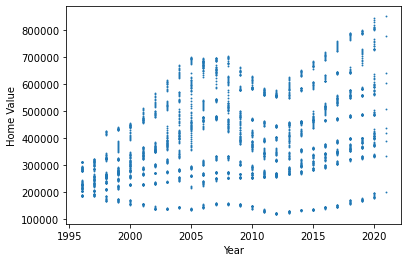

In [107]:
###  ALL ten cities=  Statistics

X = Housing_data['Year'].values.reshape(-1,1)
y= Housing_data['Home_value'].values.reshape(-1,1)
print("Shape: ", X.shape, y.shape)
plt.scatter(X,y, s=0.75)
plt.xlabel("Year")
plt.ylabel("Home Value")
Housingmodel=LinearRegression()
Housingmodel.fit(X,y)
Housingscore=Housingmodel.score(X,y)
print(f"Housing R2 Score: {Housingscore}")

In [ ]:
###  our story:  based on individual city charts above, we expect to see that larger cities will have higher variability
### in th


In [53]:
### CREATE separate dataframes per city

Houston = Housing_data.loc[Housing_data['City_Name']=='Houston, TX']

Boston = Housing_data.loc[Housing_data['City_Name']=='Boston, MA']

Waterloo = Housing_data.loc[Housing_data['City_Name']=='Waterloo, IA']

SantaFe = Housing_data.loc[Housing_data['City_Name']=='Santa Fe, NM']

StAugustine = Housing_data.loc[Housing_data['City_Name']=='St. Augustine, FL']

Williamsburg = Housing_data.loc[Housing_data['City_Name']=='Williamsburg, VA']

Portland = Housing_data.loc[Housing_data['City_Name']=='Portland, WA']

Cookeville = Housing_data.loc[Housing_data['City_Name']=='Cookeville, TN']

Charlotte = Housing_data.loc[Housing_data['City_Name']=='Charlotte, NC']

Chicago = Housing_data.loc[Housing_data['City_Name']=='Chicago, IL']


Shape:  (301, 1) (301, 1)
Houston R2 Score: 0.9024825813106777


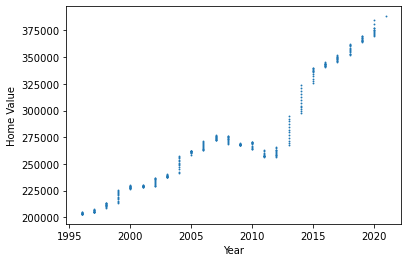

In [110]:
###  HOUSTON

X = Houston['Year'].values.reshape(-1,1)
y= Houston['Home_value'].values.reshape(-1,1)
print("Shape: ", X.shape, y.shape)

plt.scatter(X,y, s=0.75)
plt.xlabel("Year")
plt.ylabel("Home Value")

Houstonmodel=LinearRegression()
Houstonmodel.fit(X,y)
Houstonscore=Houstonmodel.score(X,y)
print(f"Houston R2 Score: {Houstonscore}")

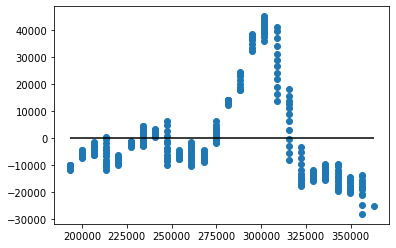

In [72]:
###  HOUSTON predictions

predictions = Houstonmodel.predict(X)

#plot residuals
plt.scatter(predictions, predictions -y)
plt.hlines(y=0, xmin=predictions.min(), xmax=predictions.max())
plt.show()

Shape:  (273, 1) (273, 1)
Santa Fe R2 Score: 0.5583904458073568


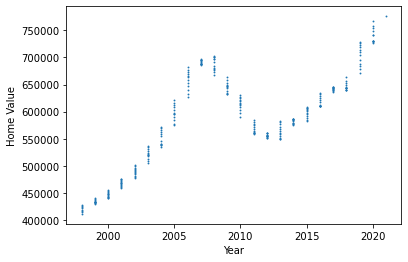

In [89]:
###  SANTE FE

X = SantaFe['Year'].values.reshape(-1,1)
y= SantaFe['Home_value'].values.reshape(-1,1)
print("Shape: ", X.shape, y.shape)
plt.scatter(X,y, s=0.75)
plt.xlabel("Year")
plt.ylabel("Home Value")
SantaFemodel=LinearRegression()
SantaFemodel.fit(X,y)
SantaFescore=SantaFemodel.score(X,y)
print(f"Santa Fe R2 Score: {SantaFescore}")

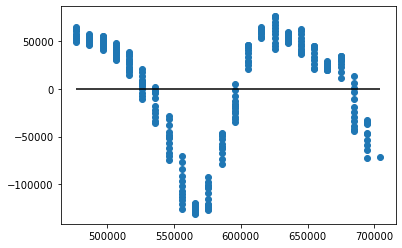

In [90]:
###  SANTE FE predictions

predictions = SantaFemodel.predict(X)

#plot residuals
plt.scatter(predictions, predictions -y)
plt.hlines(y=0, xmin=predictions.min(), xmax=predictions.max())
plt.show()


In [76]:
####  STATISTICS RELATED TO CITY SIZE  #########
####  Here, we will try to predict range of home values at different price points(ie budgets).  
####  what we expect to see:  at thtei higher budgets, the predicted range will be larger, as compared to lower budgets.


#BigCities = Housing_data.loc[Housing_data['City_Size']=='Big']
#BigCities
#MediumCities = Housing_data.loc[Housing_data['City_Size']=='Medium']
#MediumCities

In [100]:
### SPLIT DATA INTO TRAINING AND TESTING  ###

X = Housing_data["Year"].values.reshape(-1, 1)
y = Housing_data["Home_value"].values.reshape(-1, 1)

print("Shape: ", X.shape, y.shape)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)


Shape:  (2865, 1) (2865, 1)


In [101]:
ALLmodel = LinearRegression()

In [102]:
ALLmodel.fit(X_train, y_train)

LinearRegression()

In [106]:
predicted = ALLmodel.predict(X_test)

# Score the predictions with mse and r2
mse = mean_squared_error(y_test, predicted)
r2 = r2_score(y_test, predicted)


print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2 ): {r2}")

## again, this shows that using various locations for predictions is NOT good

Mean Squared Error (MSE): 19955632652.14131
R-squared (R2 ): 0.12689204065534165
